# Exercício de fixação de conceitos 2

## Objetivo

Regressão Logística Binária para o conjunto de dados de voz divido em gêneros masculino e feminino

## Importação de bibliotecas


In [1]:
import pandas as pd
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt

import seaborn as sns
import sklearn.metrics as sk
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

Leitura dos dados a partir de um txt:

In [2]:
dados = genfromtxt('dados_voz_genero.csv', delimiter=',')

In [3]:
dados = dados[1:,:] #remove cabeçalho
print(dados)

[[0.06424127 0.03202691 0.01507149 ... 0.         0.         1.        ]
 [0.06731003 0.04022874 0.01941387 ... 0.046875   0.05263158 1.        ]
 [0.08382942 0.03671846 0.00870106 ... 0.0078125  0.04651163 1.        ]
 ...
 [0.09579843 0.18373124 0.03342387 ... 2.9296875  0.19475862 0.        ]
 [0.09062826 0.18497617 0.0435081  ... 3.5859375  0.31100218 0.        ]
 [0.09288354 0.18304392 0.0700715  ... 0.546875   0.35       0.        ]]


In [4]:
# cria as matrizes X e y sendo 20% dos dados para teste e o restante para treino
X = dados[:,:-1] #remove a última coluna de 0 e 1's
y = dados[:,-1:] #seleciona somente a última coluna
y = y.ravel()

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Normalização

Visto que a regressão logística envolve a regularização l2. 

In [31]:
Xtrain_norm = Xtrain
Xtest_norm = Xtest
nstd = 4
for i in range(0,len(Xtrain[0,:])):
    Xtrain_norm[:,i] = (Xtrain[:,i] - Xtrain[:,i].mean())/(nstd*Xtrain[:,i].std())
    Xtest_norm[:,i] = (Xtest[:,i] - Xtrain[:,i].mean())/(nstd*Xtrain[:,i].std())

In [32]:
Xtrain = Xtrain_norm
Xtest= Xtest_norm


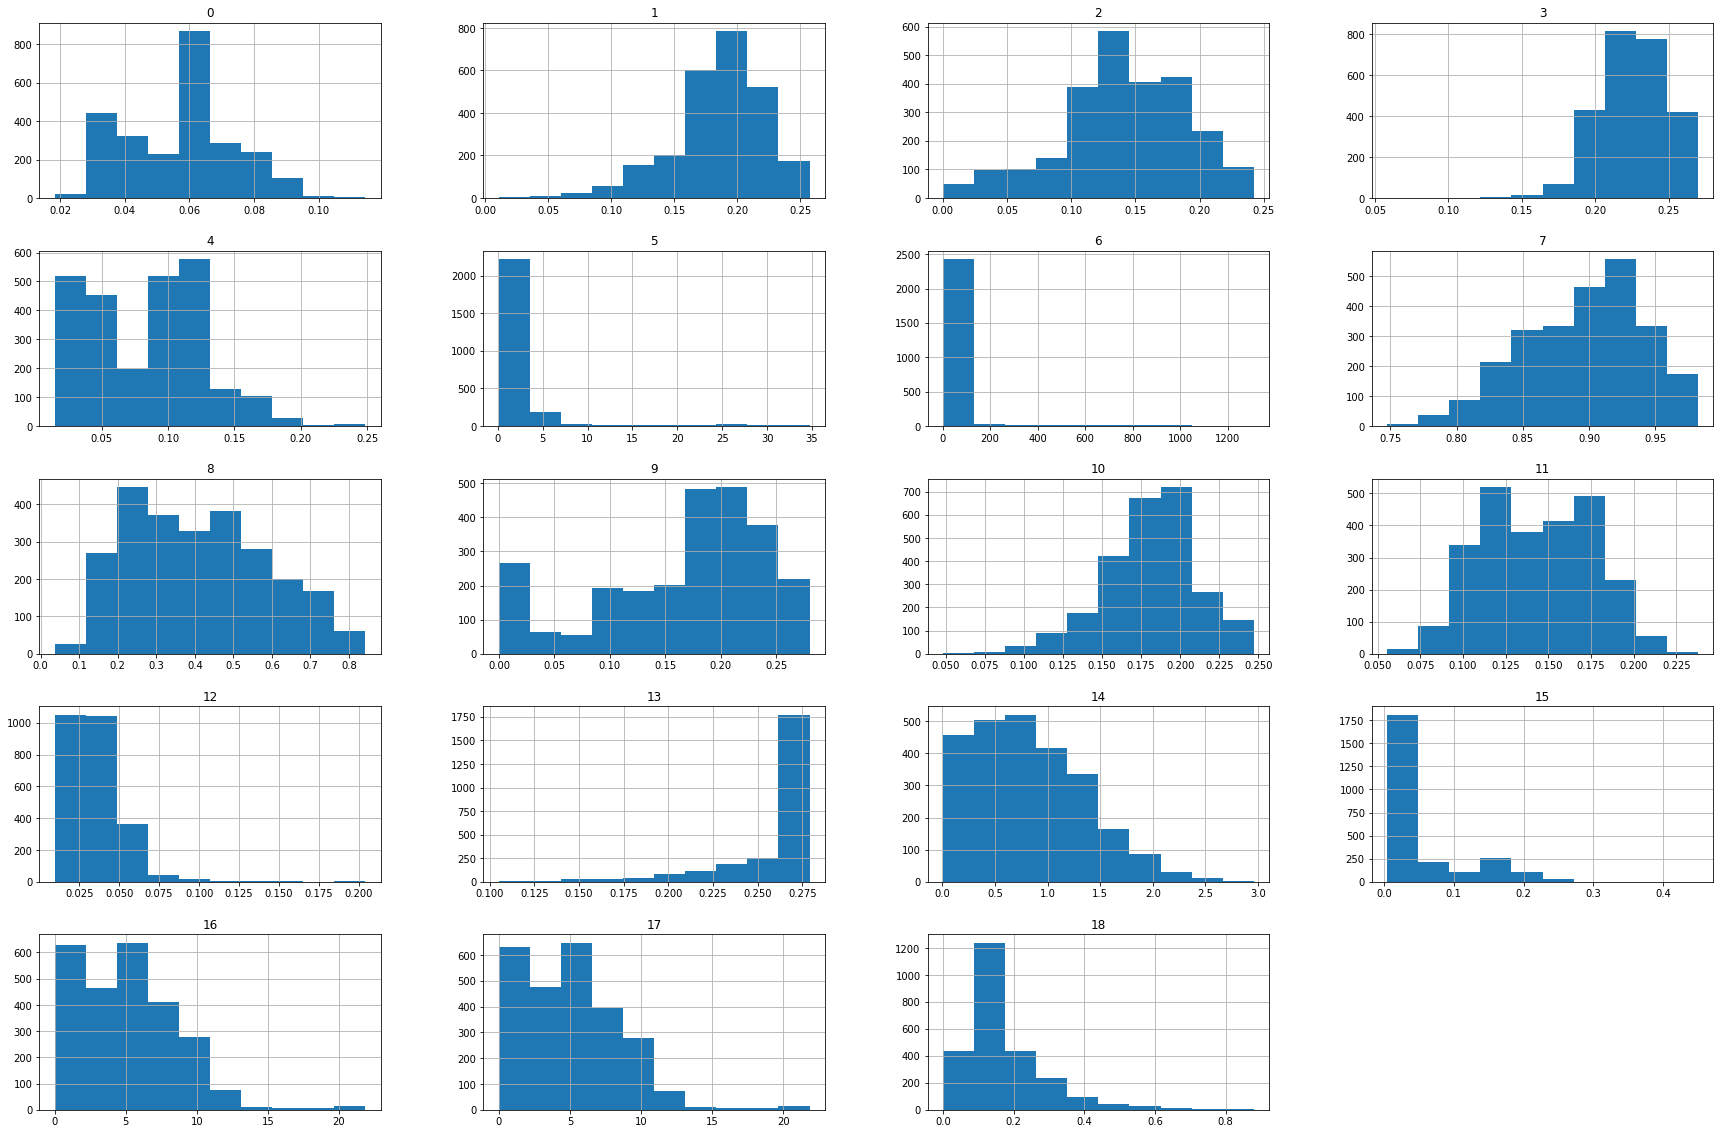

In [5]:
Xtrainpd = pd.DataFrame(Xtrain)
fig, ax = plt.subplots(figsize=(30,20)) 
Xtrainpd.hist(ax = ax)
pass

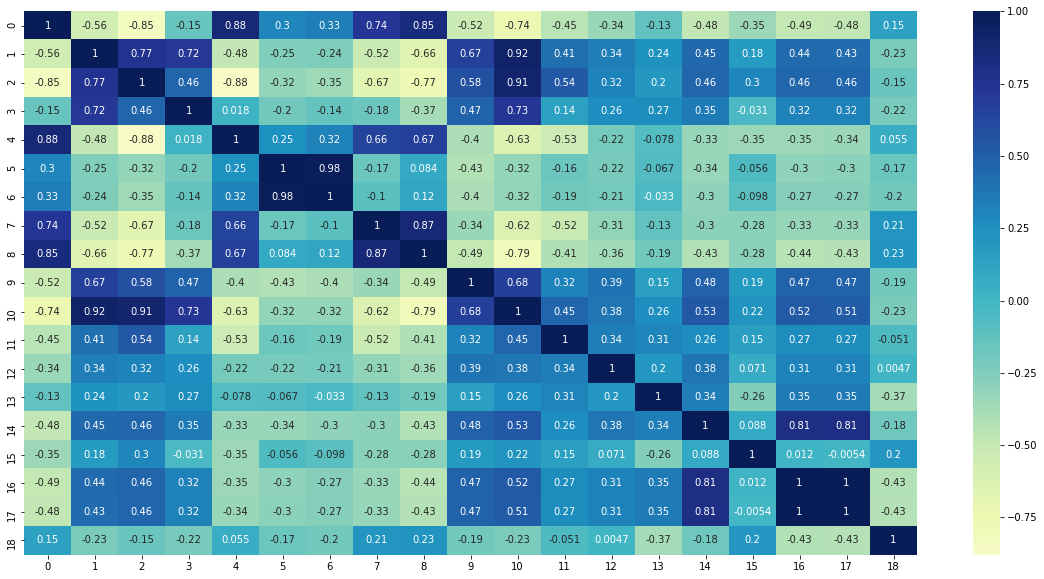

In [34]:
corrMatrix = Xtrainpd.corr()
fig, ax = plt.subplots(figsize=(20,10))         # Sample figsize in inches
sns.heatmap(corrMatrix, annot=True, ax=ax,cmap="YlGnBu", center = 0)
plt.show()


In [6]:
Xtrainpd[6].sort_values()
Xtrainpd[6].quantile(q = 0.95)

74.13659244399996

<AxesSubplot:>

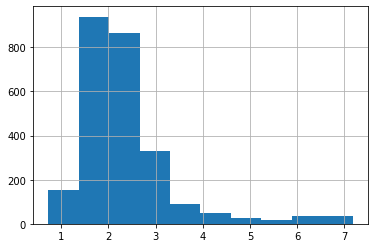

In [7]:
np.log(Xtrainpd[6]).hist()

As features 5 e 6 são muito assimétricas (skewness elevada), sendo assim seria interessante fazer algo no sentido de distribuir mais os valores no histograma.
No que se refere ao modo como os atributos estão correlacionados, observa-se que a 16 e 17 são quase colieares.

In [8]:
Xtrainpd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000
mean,0.057076,0.185897,0.140668,0.224817,0.084149,3.101255,35.411229,0.895593,0.409977,0.165914,0.181056,0.143244,0.036889,0.259010,0.831333,0.052680,5.087768,5.035088,0.173339
std,0.016609,0.035585,0.048286,0.023034,0.042857,4.115975,131.300243,0.044934,0.177693,0.076665,0.029393,0.032280,0.019097,0.029773,0.522330,0.062577,3.543251,3.543037,0.116301
min,0.018363,0.010975,0.000235,0.058268,0.014558,0.141735,2.068455,0.747569,0.036876,0.000000,0.048254,0.055565,0.009775,0.105263,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.042002,0.170161,0.111941,0.208972,0.042339,1.645452,5.686881,0.862093,0.259809,0.119505,0.164091,0.117203,0.018391,0.253968,0.420074,0.007812,2.312500,2.246094,0.100262
50%,0.059244,0.189919,0.140549,0.225499,0.093715,2.185421,8.307614,0.902328,0.397298,0.186667,0.184390,0.141514,0.046110,0.271186,0.770739,0.023438,4.992188,4.945312,0.140079
75%,0.066852,0.210309,0.175570,0.243150,0.114074,2.932971,13.626601,0.929852,0.535708,0.221459,0.198872,0.169855,0.047904,0.277457,1.189633,0.070312,7.101562,7.078125,0.210561
max,0.114508,0.257417,0.242124,0.269852,0.248770,34.725453,1309.612887,0.981997,0.842936,0.280000,0.247041,0.237636,0.204082,0.279114,2.957682,0.449219,21.867188,21.843750,0.879503


In [19]:
# regressão logística pela biblioteca SkLearn com threshold = 0,5
logreg = LogisticRegression(max_iter=3500, penalty= 'none')
logreg.fit(Xtrain, ytrain)
print("Score:",logreg.score(Xtest,ytest))

Score: 0.9779179810725552


In [12]:
# matriz de confusão para threshold = 0.5
cmatrix = sk.confusion_matrix(ytest,ypred)
print(cmatrix)

[[291  10]
 [  4 329]]


In [13]:
fpr, tpr, thresholds = roc_curve(ytest, logreg.predict_proba(Xtest)[:,1])
totalpos = ytest.sum()
totalneg = ytest.shape[0] - ytest.sum() 
precisionvec = tpr*totalpos/(tpr*totalpos+fpr*totalneg)
recallvec = tpr

In [14]:
f1score = np.nan_to_num(2*recallvec*precisionvec/(recallvec+precisionvec))

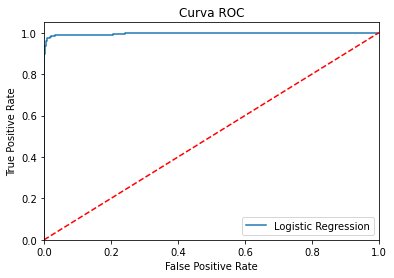

In [15]:
plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

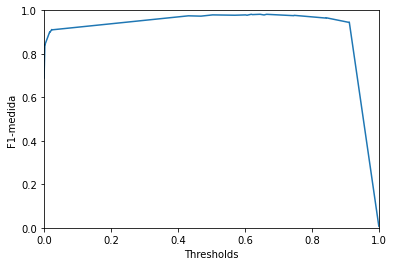

In [16]:
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Thresholds')
plt.ylabel('F1-medida')
plt.plot(thresholds,f1score,label='Falso Positivo')
plt.show()

In [17]:
bestf1 = f1score[f1score.argmax()]
besthresh = thresholds[f1score.argmax()]
print(besthresh)
print(bestf1)

0.6188575469602905
0.9819819819819819


In [20]:
# predição com o valor ótimo encontrado para threshold
ypred = (logreg.predict_proba(Xtest)[:,1] >= besthresh).astype(int)

In [21]:
f1_score(ytest,ypred)

0.9819819819819819

In [22]:
cmatrix1 = sk.confusion_matrix(ytest,ypred)
print(cmatrix1)

[[295   6]
 [  6 327]]


Text(0.5, 1.0, 'Accuracy Score: 0.9811')

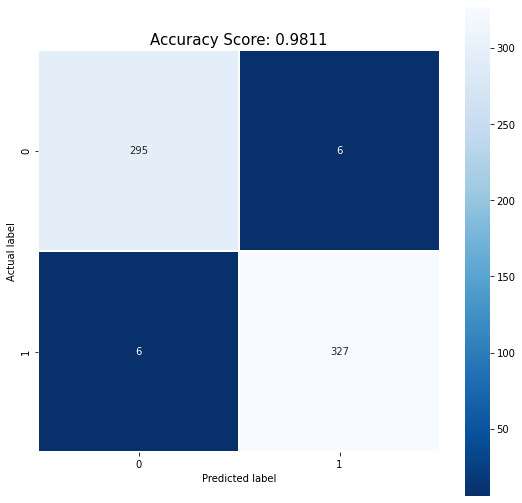

In [23]:
plt.figure(figsize=(9,9))
sns.heatmap(cmatrix1, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {:.4f}'.format(accuracy_score(ytest,ypred))
plt.title(all_sample_title, size = 15)


# Parte 2 - Classificação multi-classe

Problema: identificação de atividade humana usando dados de smartphones

In [24]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [25]:
X_test2 = genfromtxt('X_test.txt')
X_train2 = genfromtxt('X_train.txt')
y_test2 = genfromtxt('y_test.txt')
y_train2 = genfromtxt('y_train.txt')

In [26]:

print("Número de atributos: ", len(X_train2[0]))
print("Número de amostras de treino: ", len(X_train2[:,0]))
print("Número de amostras de teste: ", len(X_test2[:,0]))

Número de atributos:  561
Número de amostras de treino:  7352
Número de amostras de teste:  2947


Visualisação dos atributos da primeira amostra

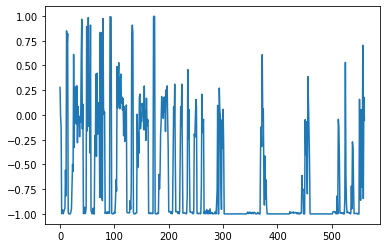

In [27]:
plt.plot(X_train2[1])

## Regressão logística através da abordagem softmax

O score é o mean accuracy

In [39]:
logreg2 = LogisticRegression(max_iter=3500, multi_class='multinomial', penalty = 'none')
logreg2.fit(X_train2, y_train2)
y_pred2softmax = logreg2.predict(X_test2)
print("Score:",f1_score(y_test2, y_pred2softmax, average='macro'))

Score: 0.9526990649984842


In [41]:
cmatrix2softmax = sk.confusion_matrix(y_test2,y_pred2softmax)
print(cmatrix2softmax)

[[494   2   0   0   0   0]
 [ 31 432   8   0   0   0]
 [  7   9 404   0   0   0]
 [  0   2   0 438  50   1]
 [  0   0   0  28 504   0]
 [  0   0   0   1   0 536]]


## Classificação one-vs-all


O problema não é desbalanceado, nesse sentido optar pela mu ou M não faria tanta diferença em termos de privelegiar ou não uma classe ou outra. Optamos por usar a M...

In [42]:
clf = LogisticRegression(max_iter=3500, multi_class='ovr', penalty = 'none').fit(X_train2, y_train2)
y_pred2oneall = clf.predict(X_test2)
print("Score:", f1_score(y_test2, y_pred2oneall, average='macro'))

Score: 0.9507465883518943


[[492   1   2   1   0   0]
 [ 36 431   4   0   0   0]
 [  2   7 411   0   0   0]
 [  0   1   0 418  51  21]
 [  1   0   0  15 513   3]
 [  0   0   0   0   0 537]]


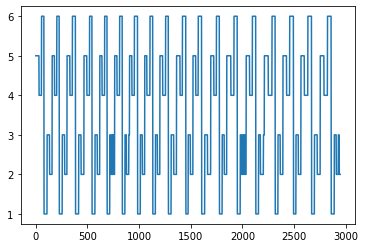

In [43]:
# matriz de confusão
cmatrix2oneall = sk.confusion_matrix(y_test2,y_pred2oneall)
print(cmatrix2oneall)

plt.plot(y_test2)

In [51]:
F1medida_knn = []
nknn = 21
for i in range(1,nknn):
    neigh = KNeighborsClassifier(n_neighbors = i)
    neigh.fit(X_train2, y_train2)
    y_pred_knn = neigh.predict(X_test2)
    F1medida_knn.append(f1_score(y_test2, y_pred_knn, average='macro'))
    print('F1medida para k = ',i, ': ', F1medida_knn[i-1])
    print('Matriz de confusão para k = ', i)
    print(sk.confusion_matrix(y_test2,y_pred_knn))
    print()


F1medida para k =  1 :  0.8754095346937208
Matriz de confusão para k =  1
[[473   8  15   0   0   0]
 [ 31 422  18   0   0   0]
 [ 53  46 321   0   0   0]
 [  0   2   0 389  99   1]
 [  0   0   0  81 451   0]
 [  0   0   0   3   1 533]]

F1medida para k =  2 :  0.8562633495030388
Matriz de confusão para k =  2
[[481   5  10   0   0   0]
 [ 58 408   5   0   0   0]
 [ 80  60 280   0   0   0]
 [  0   3   0 433  55   0]
 [  0   0   0 128 404   0]
 [  0   0   0   4   1 532]]

F1medida para k =  3 :  0.8877674593824842
Matriz de confusão para k =  3
[[481   4  11   0   0   0]
 [ 36 422  13   0   0   0]
 [ 49  42 329   0   0   0]
 [  0   3   0 383 105   0]
 [  0   0   0  57 475   0]
 [  0   0   0   1   1 535]]

F1medida para k =  4 :  0.8872860298074353
Matriz de confusão para k =  4
[[486   1   9   0   0   0]
 [ 44 420   7   0   0   0]
 [ 58  53 309   0   0   0]
 [  0   3   0 420  68   0]
 [  0   0   0  74 458   0]
 [  0   0   0   3   1 533]]

F1medida para k =  5 :  0.8985210973000696
Matri

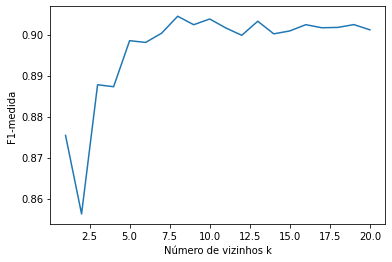

In [62]:
plt.plot(range(1,nknn),F1medida_knn)
plt.xlabel('Número de vizinhos k');
plt.ylabel('F1-medida');
pass

In [63]:
F1medida_knn = np.array(F1medida_knn)
bestf1_knn = F1medida_knn[F1medida_knn.argmax()]
bestknn = F1medida_knn.argmax()
print('Melhor valor para k: ',bestknn)
print('F1medida para o melhor valor de k: ', bestf1_knn)

Melhor valor para k:  7
F1medida para o melhor valor de k:  0.9044789027262965


## Técnica kNN (k-nearest neighbors) 